In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prayag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# creating empty reviews list
iphone13_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone13_reviews=iphone13_reviews+ip

# writng reviews in a text file 
with open("iphone13.txt","w",encoding='utf8') as output:
    output.write(str(iphone13_reviews))

In [3]:
iphone13_reviews

['\nExpensive\n',
 '\nExpensive\n',
 '\nAwesome engineering\n',
 '\nExpensive\n',
 '\nAwesome engineering\n',
 "\nPros-Camera, performance, display, tremendous video recording capability,3x optical zoom  ,sensor shifting ois,super smooth 120 hertz displayCons -heavy weight and with cover it's almost 300 gramsOverall, it's one of the best  flagship smartphone.\n",
 '\nExpensive\n',
 '\nAwesome engineering\n',
 "\nPros-Camera, performance, display, tremendous video recording capability,3x optical zoom  ,sensor shifting ois,super smooth 120 hertz displayCons -heavy weight and with cover it's almost 300 gramsOverall, it's one of the best  flagship smartphone.\n",
 '\nOpen box diye sim tool nahi aa ya but phone mast aaya\n',
 '\nExpensive\n',
 '\nAwesome engineering\n',
 "\nPros-Camera, performance, display, tremendous video recording capability,3x optical zoom  ,sensor shifting ois,super smooth 120 hertz displayCons -heavy weight and with cover it's almost 300 gramsOverall, it's one of the

In [4]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone13_reviews)

In [5]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [6]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'expensive', 'expensive', 'awesome', 'engineering', 'expensive', 'awesome', 'engineering', 'pros', 'camera', 'performance', 'display', 'tremendous', 'video', 'recording', 'capability', 'x', 'optical', 'zoom', 'sensor', 'shifting', 'ois', 'super', 'smooth', 'hertz', 'displaycons', 'heavy', 'weight', 'and', 'with', 'cover', 'it', 's', 'almost', 'gramsoverall', 'it', 's', 'one', 'of', 'the', 'best', 'flagship', 'smartphone', 'expensive', 'awesome', 'engineering', 'pros', 'camera', 'performance', 'display', 'tremendous', 'video', 'recording', 'capability', 'x', 'optical', 'zoom', 'sensor', 'shifting', 'ois', 'super', 'smooth', 'hertz', 'displaycons', 'heavy', 'weight', 'and', 'with', 'cover', 'it', 's', 'almost', 'gramsoverall', 'it', 's', 'one', 'of', 'the', 'best', 'flagship', 'smartphone', 'open', 'box', 'diye', 'sim', 'tool', 'nahi', 'aa', 'ya', 'but', 'phone', 'mast', 'aaya', 'expensive', 'awesome', 'engineering', 'pros', 'camera', 'performance', 'display', 'tremendous', 'video',

In [9]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=iphone13_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

C:\Users\Prayag\anaconda3\lib\site-packages\spacy\displacy\__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [10]:
with open("G:\Assignments\Text mining\stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [11]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)

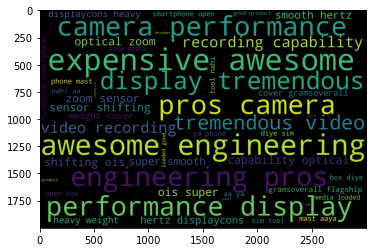

In [12]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [14]:
# positive words # Choose the path for +ve words stored in system
with open("G:\Assignments\Text mining\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [15]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

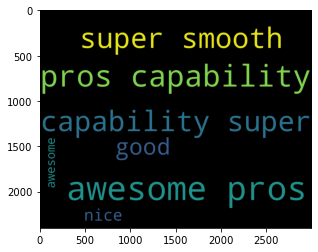

In [16]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [23]:
# Choosing the only words which are present in negativewords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

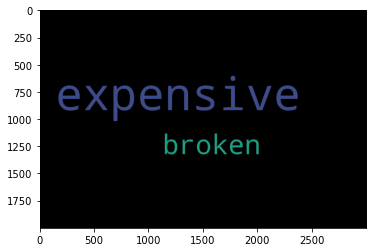

In [24]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)